In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data = pd.read_csv("Cars-dataset.csv")

In [3]:
data.shape


(418, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 27.8+ KB


In [5]:
data.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0
5,21,Male,0,0,3,9.5,7.1,0,0
6,23,Male,1,1,3,11.7,7.2,0,0
7,23,Male,0,0,0,6.5,7.3,0,0
8,24,Male,1,0,4,8.5,7.5,0,0
9,28,Male,1,0,6,13.7,7.5,1,0


In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,418.0,NaN,NaN,NaN,27.334928,4.153272,18.0,25.0,27.0,29.0,43.0
Gender,418,2,Male,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,418.0,NaN,NaN,NaN,0.748804,0.434221,0.0,0.25,1.0,1.0,1.0
MBA,418.0,NaN,NaN,NaN,0.260766,0.439578,0.0,0.0,0.0,1.0,1.0
Work Exp,418.0,NaN,NaN,NaN,5.873206,4.81611,0.0,3.0,5.0,8.0,24.0
Salary,418.0,NaN,NaN,NaN,15.418421,9.660234,6.5,9.625,13.0,14.9,57.0
Distance,418.0,NaN,NaN,NaN,11.30622,3.722143,3.2,8.6,10.9,13.575,23.4
license,418.0,NaN,NaN,NaN,0.205742,0.404727,0.0,0.0,0.0,0.0,1.0
Opt_service,418.0,NaN,NaN,NaN,0.083732,0.277317,0.0,0.0,0.0,0.0,1.0


In [7]:
data.isnull().sum()

Age            0
Gender         0
Engineer       0
MBA            0
Work Exp       0
Salary         0
Distance       0
license        0
Opt_service    0
dtype: int64

In [8]:
car_data = data.copy()

In [9]:
#data.drop(['Age'],axis=1,inplace=True)

In [10]:
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Age are :
26    63
27    49
28    46
24    46
25    37
30    33
29    26
23    24
22    15
31    13
34     9
21     8
32     8
38     6
40     6
33     6
20     5
39     4
36     4
37     4
18     2
35     1
19     1
42     1
43     1
Name: Age, dtype: int64
**************************************************
Unique values in Gender are :
Male      297
Female    121
Name: Gender, dtype: int64
**************************************************
Unique values in Engineer are :
1    313
0    105
Name: Engineer, dtype: int64
**************************************************
Unique values in MBA are :
0    309
1    109
Name: MBA, dtype: int64
**************************************************
Unique values in Work Exp are :
4     53
2     47
3     46
6     45
5     42
0     29
8     28
7     27
1     22
9     17
10    12
11     7
14     7
19     6
20     6
16     5
21     4
12     4
18     3
22     3
13     2
17     1
15     1
24     1
Name: Work Exp, dtype: int64
**********

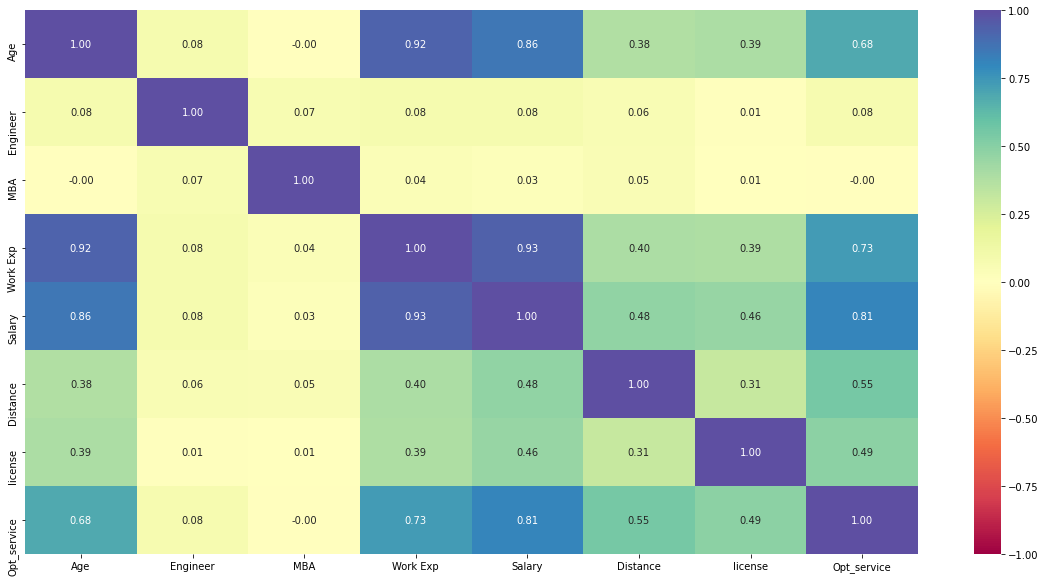

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

In [12]:
data.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Opt_service'],
      dtype='object')

In [13]:
## Who are Engineer and MBA  
dt = data[(data['Engineer'] == 1) & (data['MBA'] == 1)]
dt


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
6,23,Male,1,1,3,11.7,7.2,0,0
19,22,Female,1,1,2,8.5,9.5,0,0
22,34,Male,1,1,14,36.9,10.4,1,0
26,25,Male,1,1,7,13.6,10.7,0,0
27,28,Male,1,1,5,14.8,10.8,1,0
...,...,...,...,...,...,...,...,...,...
403,22,Male,1,1,0,6.9,15.7,0,0
404,23,Male,1,1,2,8.9,15.8,0,0
410,32,Female,1,1,9,15.9,16.6,0,0
413,29,Male,1,1,8,13.9,17.1,0,0


In [14]:
dt[dt['Opt_service'] ==1].count()

Age            9
Gender         9
Engineer       9
MBA            9
Work Exp       9
Salary         9
Distance       9
license        9
Opt_service    9
dtype: int64

In [15]:
data['Gender'] = pd.Categorical(data['Gender'])
    

In [16]:
replaceStruct = {    
    "Gender":     {"Male":1,"Female" : 0}
}


In [17]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data)
data.head(10)


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,1,1,0,5,14.4,5.1,0,0
1,24,1,1,0,6,10.6,6.1,0,0
2,27,0,1,0,9,15.5,6.1,0,0
3,25,1,0,0,1,7.6,6.3,0,0
4,25,0,0,0,3,9.6,6.7,0,0
5,21,1,0,0,3,9.5,7.1,0,0
6,23,1,1,1,3,11.7,7.2,0,0
7,23,1,0,0,0,6.5,7.3,0,0
8,24,1,1,0,4,8.5,7.5,0,0
9,28,1,1,0,6,13.7,7.5,1,0


In [18]:
X = data.drop("Opt_service" , axis=1)
y = data.pop("Opt_service")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [20]:
y_test.value_counts()

0    115
1     11
Name: Opt_service, dtype: int64

In [21]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_train)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    F1_score_train = f1_score(y_train,pred_train)
    
    F1_score_test = f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        
        print("F1 Score on train set : ", F1_score_train)
        print("F1 Score on test set : ", F1_score_test)
        
    
    return score_list # returning the list with train and test scores

In [23]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [24]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9965753424657534
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  0.96
Precision on test set :  0.625
F1 Score on train set :  0.9795918367346939
F1 Score on test set :  0.7407407407407406


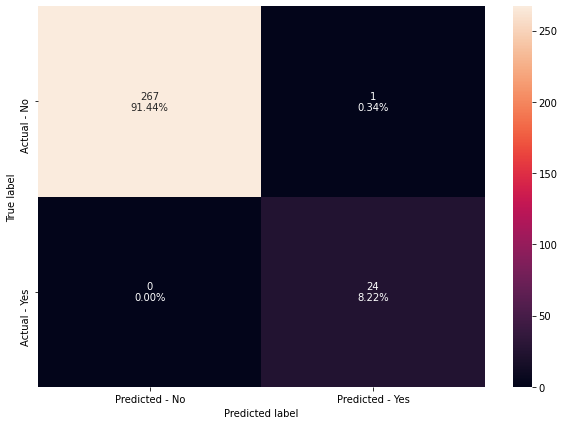

In [25]:
make_confusion_matrix(bagging_estimator,y_train)

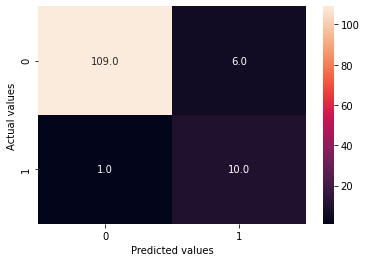

In [26]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train, y_train)

# predicting on training set
y_train_pred = bag.predict(X_test)
# creating the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_train_pred),annot=True,fmt='.1f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [27]:
scores = []
for i in range(1,6):
 bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,max_depth = i),random_state=1)
 bag.fit(X_train, y_train)
 pred = bag.predict(X_train)
 case = {'Depth':i,'F1 Score':f1_score(y_train,pred)}
 scores.append(case)

In [28]:
print(scores)

[{'Depth': 1, 'F1 Score': 0.9583333333333334}, {'Depth': 2, 'F1 Score': 0.9583333333333334}, {'Depth': 3, 'F1 Score': 0.9795918367346939}, {'Depth': 4, 'F1 Score': 0.9795918367346939}, {'Depth': 5, 'F1 Score': 0.9795918367346939}]


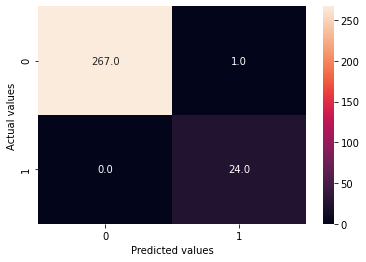

In [29]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train, y_train)

# predicting on training set
y_train_pred = bag.predict(X_train)
# creating the confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [30]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [31]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429
F1 Score on train set :  1.0
F1 Score on test set :  0.7200000000000001


In [34]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [35]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9682539682539683
Recall on training set :  1.0
Recall on test set :  0.7272727272727273
Precision on training set :  1.0
Precision on test set :  0.8888888888888888
F1 Score on train set :  1.0
F1 Score on test set :  0.7999999999999999


In [38]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [39]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143
F1 Score on train set :  1.0
F1 Score on test set :  0.8


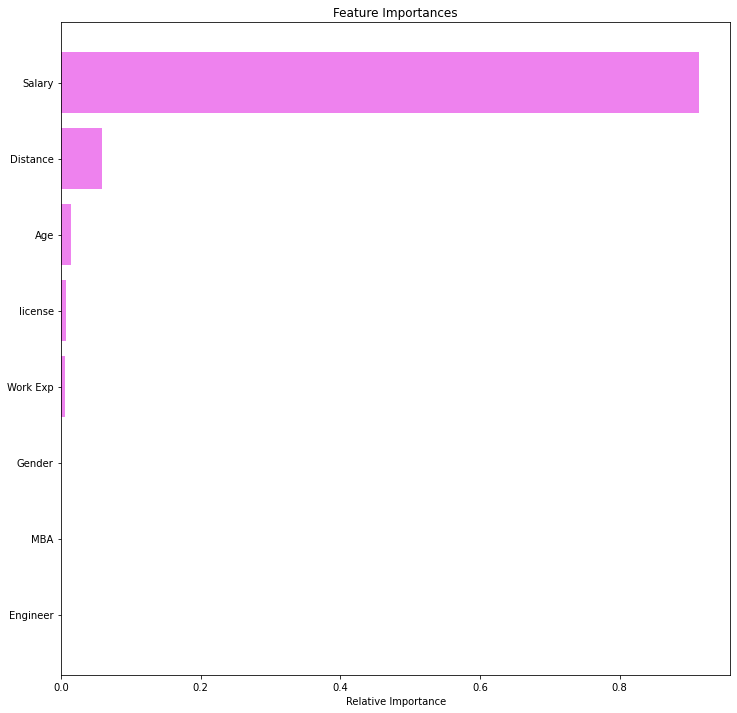

In [40]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [41]:
gbc1 = GradientBoostingClassifier(random_state=1, n_estimators = 50, learning_rate = 0.01)
gbc1.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc1)


Accuracy on training set :  0.9178082191780822
Accuracy on test set :  0.9126984126984127
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1 Score on train set :  0.0
F1 Score on test set :  0.0


In [42]:
gbc2 = GradientBoostingClassifier(random_state=1, n_estimators = 100, learning_rate = 0.01)
gbc2.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc2)

Accuracy on training set :  1.0
Accuracy on test set :  0.9523809523809523
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6923076923076923
F1 Score on train set :  1.0
F1 Score on test set :  0.7500000000000001


In [43]:
gbc3 = GradientBoostingClassifier(random_state=1, n_estimators = 400, learning_rate = 0.01)
gbc3.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc3)

Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143
F1 Score on train set :  1.0
F1 Score on test set :  0.8


In [44]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [45]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision   F1
0  0.960317  0.909091   0.714286  0.8


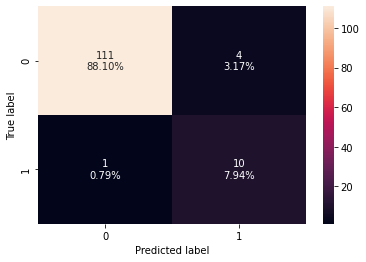

In [46]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [47]:
# creating list of estimators
estimators = [('DT',DecisionTreeClassifier(random_state=1)), ('BAG',BaggingClassifier(random_state=1))]
# Training stacking classifier
clf = StackingClassifier(estimators = estimators, final_estimator = RandomForestClassifier(random_state=1))
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier(random_state=1)),
                               ('BAG', BaggingClassifier(random_state=1))],
                   final_estimator=RandomForestClassifier(random_state=1))

In [48]:
# Predicting on training set
y_pred = clf.predict(X_train)
# Checking model performance
print('F1 score')
f1_score(y_train,y_pred)
print('Recall score')
recall_score(y_train,y_pred)

F1 score
Recall score


1.0

In [49]:
y_pred = clf.predict(X_train)
# Checking model performance
print('F1 score')
f1_score(y_train,y_pred)
print('Recall score')
recall_score(y_train,y_pred)

F1 score
Recall score


1.0

In [50]:
# Predicting on test set
y_pred = clf.predict(X_test)
# Checking model performance
print('F1 Score')
print(f1_score(y_test,y_pred))
print('Recall Score')
recall_score(y_test,y_pred)

F1 Score
0.7407407407407406
Recall Score


0.9090909090909091

In [57]:
scores = []
for i in range(1,6):
 bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,max_depth = i),random_state=1)
 bag.fit(X_train, y_train)
 pred = bag.predict(X_train)
 case = {'Depth':i,'F1 Score':f1_score(y_train,pred)}
 scores.append(case)


In [65]:
scores = []
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,max_depth = 4),random_state=1)
bag.fit(X_train, y_train)
pred = bag.predict(X_train)
case1 = {'Depth':i,'F1 Score':f1_score(y_train,pred)}
scores.append(case1)


In [66]:
print(scores)

[{'Depth': 5, 'F1 Score': 0.9795918367346939}]


In [67]:
scores = []
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,max_depth = 5),random_state=1)
bag.fit(X_train, y_train)
pred = bag.predict(X_train)
case2 = {'Depth':i,'F1 Score':f1_score(y_train,pred)}
scores.append(case2)


In [68]:
print(scores)

[{'Depth': 5, 'F1 Score': 0.9795918367346939}]
